In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

In [2]:
 def read_file(file):
    '''Reads Whatsapp text file into a list of strings''' 

    x = open(file,'r', encoding = 'utf-8') #Opens the text file into variable x but the variable cannot be explored yet
    y = x.read() #By now it becomes a huge chunk of string that we need to separate line by line
    content = y.splitlines() #The splitline method converts the chunk of string into a list of strings
    return content 

In [3]:
chat = read_file('chat.txt')
len(chat) 

4496

In [4]:
join = [line for line in chat if  "joined using this" in line]
join

["23/09/2019, 6:36 pm - +1 (804) 352-3515 joined using this group's invite link",
 "23/09/2019, 11:35 pm - +91 99243 88802 joined using this group's invite link",
 "27/09/2019, 2:43 am - +91 83684 13867 joined using this group's invite link",
 "30/09/2019, 12:50 pm - +1 (213) 550-3646 joined using this group's invite link",
 "03/10/2019, 10:41 pm - +91 77610 02200 joined using this group's invite link",
 "04/10/2019, 9:07 pm - +91 91493 72412 joined using this group's invite link",
 "06/10/2019, 1:01 pm - +91 84091 79088 joined using this group's invite link",
 "07/10/2019, 6:16 pm - +91 89850 20507 joined using this group's invite link",
 "14/10/2019, 4:37 pm - +232 77 609817 joined using this group's invite link",
 "17/10/2019, 5:57 am - +91 82876 61013 joined using this group's invite link",
 "17/10/2019, 8:25 am - +91 74648 24676 joined using this group's invite link",
 "17/10/2019, 9:29 am - +91 81960 87074 joined using this group's invite link",
 "17/10/2019, 9:46 am - +91 79754 

In [5]:
#Remove new lines
chat = [line.strip() for line in chat]
print("length of chat is:")
print(len(chat))

#Clean out the join notification lines
clean_chat = [line for line in chat if not "joined using this" in line]

#Further cleaning
#Remove empty lines
clean_chat = [line for line in clean_chat if len(line) > 1]
print("length of clean_chat is:")
print(len(clean_chat)) 

length of chat is:
4496
length of clean_chat is:
3483


In [6]:
 #Drop 'left-ers'
left = [line for line in clean_chat if line.endswith("left")]
left 

['28/09/2019, 12:57 pm - +91 97389 48992 left',
 '04/10/2019, 2:22 pm - +91 77610 02200 left',
 '07/10/2019, 6:21 pm - +91 89850 20507 left',
 '07/10/2019, 10:57 pm - +91 6352 420 241 left',
 '08/10/2019, 2:51 pm - +91 99041 96904 left',
 '08/10/2019, 5:06 pm - +91 91493 72412 left',
 '09/10/2019, 10:37 pm - +91 94660 22586 left',
 '11/10/2019, 10:59 am - +91 96721 12253 left',
 '14/10/2019, 8:08 pm - +91 96368 09637 left',
 '19/10/2019, 7:40 pm - +91 98499 32056 left',
 '21/10/2019, 5:05 pm - +91 90042 73419 left',
 '22/10/2019, 9:47 pm - +91 89771 43198 left',
 '24/10/2019, 6:28 pm - +91 79933 92589 left',
 '24/10/2019, 8:27 pm - +91 90604 86010 left',
 '24/10/2019, 10:28 pm - +91 91605 85271 left',
 '29/10/2019, 5:30 pm - +91 93909 58523 left',
 '29/10/2019, 8:01 pm - +91 93224 01234 left',
 '04/11/2019, 9:34 am - +91 73531 33948 left',
 '09/11/2019, 7:03 am - +91 97055 95691 left',
 '12/11/2019, 6:43 am - +91 91796 63001 left',
 '12/11/2019, 10:38 am - +91 93228 01234 left',
 '15/1

In [7]:
#Clean out the left notification lines
clean_chat = [line for line in clean_chat if not line.endswith("left")]
print(len(clean_chat)) 

3325


In [8]:
clean_chat = [line for line in clean_chat if not line.endswith("<Media omitted>")]
print(len(clean_chat)) 

2753


In [9]:
#Merge messages that belong together
msgs = [] #message container
pos = 0 #counter for position of msgs in the container
"""
Flow:
For every line, see if it matches the expression which is starting with the format "number(s)+slash" eg "12/"
If it does, it is a new line of conversion as they begin with dates, add it to msgs container
Else, it is a continuation of the previous line, add it to the previous line and append to msgs, then pop previous line.
"""
for line in clean_chat:
    if re.findall("\A\d+[/]", line):
        msgs.append(line)
        pos += 1
    else:
        take = msgs[pos-1] + ". " + line
        msgs.append(take)
        msgs.pop(pos-1)
len(msgs) 

754

In [10]:
time = [msgs[i].split(',')[1].split('-')[0] for i in range(len(msgs))]
time = [s.strip(' ') for s in time] # Remove spacing
print("length of time is:")
print(len(time))
time

length of time is:
754


['9:29 pm',
 '4:58 pm',
 '6:40 pm',
 '6:49 pm',
 '10:51 am',
 '11:14 am',
 '2:06 pm',
 '3:52 pm',
 '8:37 pm',
 '11:51 am',
 '12:04 pm',
 '12:04 pm',
 '12:13 pm',
 '2:57 pm',
 '10:20 am',
 '5:16 pm',
 '5:16 pm',
 '11:40 am',
 '9:48 pm',
 '9:25 am',
 '9:35 am',
 '10:17 am',
 '9:03 am',
 '2:07 pm',
 '4:36 pm',
 '7:38 pm',
 '10:41 pm',
 '10:41 pm',
 '12:31 am',
 '1:12 pm',
 '1:54 pm',
 '7:44 pm',
 '8:03 pm',
 '9:33 am',
 '10:38 am',
 '10:41 am',
 '10:42 am',
 '1:22 pm',
 '7:20 am',
 '10:59 am',
 '12:45 pm',
 '1:22 pm',
 '1:35 pm',
 '1:50 pm',
 '1:50 pm',
 '5:02 pm',
 '5:56 pm',
 '1:07 pm',
 '2:17 pm',
 '3:18 pm',
 '8:39 pm',
 '9:08 pm',
 '7:53 am',
 '2:53 pm',
 '3:05 pm',
 '5:27 pm',
 '10:52 pm',
 '12:04 am',
 '12:07 am',
 '8:30 pm',
 '9:16 pm',
 '5:30 pm',
 '5:36 pm',
 '9:22 pm',
 '12:31 pm',
 '12:31 pm',
 '10:32 am',
 '7:35 pm',
 '7:42 pm',
 '12:24 am',
 '12:31 am',
 '12:37 am',
 '12:26 pm',
 '7:37 am',
 '10:34 am',
 '6:32 pm',
 '9:17 pm',
 '9:17 pm',
 '9:30 pm',
 '9:37 pm',
 '9:38 pm',


In [11]:
date = [msgs[i].split(',')[0] for i in range(len(msgs))]
len(date) 

name = [msgs[i].split('-')[1].split(':')[0] for i in range(len(msgs))]
len(name) 

content = []
for i in range(len(msgs)):
  try:
    content.append(msgs[i].split(':')[2])
  except IndexError:
    content.append('Missing Text')
len(content)

754

In [12]:
df = pd.DataFrame(list(zip(date, time, name, content)), columns = ['Date', 'Time', 'Name', 'Content'])
df.describe() 

,Date,Time,Name,Content
count,754,754,754,754
unique,153,500,254,477
top,15/03/2020,1:07 pm,+91 98920 19369,https
freq,24,9,39,139


In [13]:
df = df[df["Content"]!='Missing Text']
df.reset_index(inplace=True, drop=True)
df

,Date,Time,Name,Content
0,23/09/2019,4:58 pm,+91 94660 22586,"*जरूरी सुचना*. बैंक बंन्द रहेंगे , समय रहते ज..."
1,23/09/2019,6:40 pm,+1 (804) 352,🔴WORK IN coca cola Company in USA. 🆓Free Visa...
2,24/09/2019,10:51 am,+91 92840 00520,मल्चिंग पेपर ( Mulching Paper ). 1) उच्च गुणव...
3,24/09/2019,11:14 am,+91 98110 18213,"Olive , ready to harvest, farm is 15 yrs old...."
4,24/09/2019,2:06 pm,+91 94538 10792,https
5,24/09/2019,3:52 pm,+91 84097 08070,❓
6,24/09/2019,8:37 pm,+91 98734 29810,If anyone has kept FD or amount in savings ac...
7,25/09/2019,11:51 am,+91 96368 09637,अनार फ्रूट के ऊपर काले धब्बे होने की समस्या ह...
8,25/09/2019,12:04 pm,+91 75684 94262,Me Jalore Rajasthan se hu
9,25/09/2019,12:04 pm,+91 75684 94262,Melia dubia (Malabar neem) Ke plants hain kya...


In [14]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['DateTime'] 

0     2019-09-23 16:58:00
1     2019-09-23 18:40:00
2     2019-09-24 10:51:00
3     2019-09-24 11:14:00
4     2019-09-24 14:06:00
5     2019-09-24 15:52:00
6     2019-09-24 20:37:00
7     2019-09-25 11:51:00
8     2019-09-25 12:04:00
9     2019-09-25 12:04:00
10    2019-09-25 12:13:00
11    2019-09-25 14:57:00
12    2019-09-26 10:20:00
13    2019-09-26 17:16:00
14    2019-09-26 17:16:00
15    2019-09-27 11:40:00
16    2019-09-27 21:48:00
17    2019-09-28 09:25:00
18    2019-09-28 09:35:00
19    2019-03-10 16:36:00
20    2019-04-10 22:41:00
21    2019-04-10 22:41:00
22    2019-05-10 00:31:00
23    2019-05-10 13:12:00
24    2019-05-10 19:44:00
25    2019-06-10 09:33:00
26    2019-06-10 10:38:00
27    2019-06-10 10:41:00
28    2019-06-10 10:42:00
29    2019-07-10 07:20:00
              ...        
637   2020-03-15 10:41:00
638   2020-03-15 10:41:00
639   2020-03-15 10:42:00
640   2020-03-15 10:42:00
641   2020-03-15 10:46:00
642   2020-03-15 10:48:00
643   2020-03-15 10:49:00
644   2020-0

In [15]:
df['weekday'] = df['DateTime'].apply(lambda x: x.day_name()) 

In [16]:
df['Letter_Count'] = df['Content'].apply(lambda s : len(s))
df['Word_Count'] = df['Content'].apply(lambda s : len(s.split(' ')))

In [17]:
df['Hour'] = df['Time'].apply(lambda x : x.split(':')[0]) 
# The first token of a value in the Time Column contains the hour (Eg., "12" in "12:15")

In [18]:
#print first five rows of our dataframe
df.head()

,Date,Time,Name,Content,DateTime,weekday,Letter_Count,Word_Count,Hour
0,23/09/2019,4:58 pm,+91 94660 22586,"*जरूरी सुचना*. बैंक बंन्द रहेंगे , समय रहते ज...",2019-09-23 16:58:00,Monday,315,65,4
1,23/09/2019,6:40 pm,+1 (804) 352,🔴WORK IN coca cola Company in USA. 🆓Free Visa...,2019-09-23 18:40:00,Monday,465,77,6
2,24/09/2019,10:51 am,+91 92840 00520,मल्चिंग पेपर ( Mulching Paper ). 1) उच्च गुणव...,2019-09-24 10:51:00,Tuesday,539,104,10
3,24/09/2019,11:14 am,+91 98110 18213,"Olive , ready to harvest, farm is 15 yrs old....",2019-09-24 11:14:00,Tuesday,171,30,11
4,24/09/2019,2:06 pm,+91 94538 10792,https,2019-09-24 14:06:00,Tuesday,6,2,2


In [19]:
df

,Date,Time,Name,Content,DateTime,weekday,Letter_Count,Word_Count,Hour
0,23/09/2019,4:58 pm,+91 94660 22586,"*जरूरी सुचना*. बैंक बंन्द रहेंगे , समय रहते ज...",2019-09-23 16:58:00,Monday,315,65,4
1,23/09/2019,6:40 pm,+1 (804) 352,🔴WORK IN coca cola Company in USA. 🆓Free Visa...,2019-09-23 18:40:00,Monday,465,77,6
2,24/09/2019,10:51 am,+91 92840 00520,मल्चिंग पेपर ( Mulching Paper ). 1) उच्च गुणव...,2019-09-24 10:51:00,Tuesday,539,104,10
3,24/09/2019,11:14 am,+91 98110 18213,"Olive , ready to harvest, farm is 15 yrs old....",2019-09-24 11:14:00,Tuesday,171,30,11
4,24/09/2019,2:06 pm,+91 94538 10792,https,2019-09-24 14:06:00,Tuesday,6,2,2
5,24/09/2019,3:52 pm,+91 84097 08070,❓,2019-09-24 15:52:00,Tuesday,2,2,3
6,24/09/2019,8:37 pm,+91 98734 29810,If anyone has kept FD or amount in savings ac...,2019-09-24 20:37:00,Tuesday,182,32,8
7,25/09/2019,11:51 am,+91 96368 09637,अनार फ्रूट के ऊपर काले धब्बे होने की समस्या ह...,2019-09-25 11:51:00,Wednesday,127,29,11
8,25/09/2019,12:04 pm,+91 75684 94262,Me Jalore Rajasthan se hu,2019-09-25 12:04:00,Wednesday,26,6,12
9,25/09/2019,12:04 pm,+91 75684 94262,Melia dubia (Malabar neem) Ke plants hain kya...,2019-09-25 12:04:00,Wednesday,59,12,12


In [20]:
#Import Library
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
stopword=open("stopwords.txt",'r',encoding = 'utf-8')
stopwords1 = set(stopwords.words('english'))
stop_words=[]
#pre-process stopword
for i in stopword:
    i = re.sub('[\n]', '', i)
    stop_words.append(i)
    stopwords = set(stop_words)
news=stopwords.union(stopwords1)

There are 85702 words in the combination of all review.


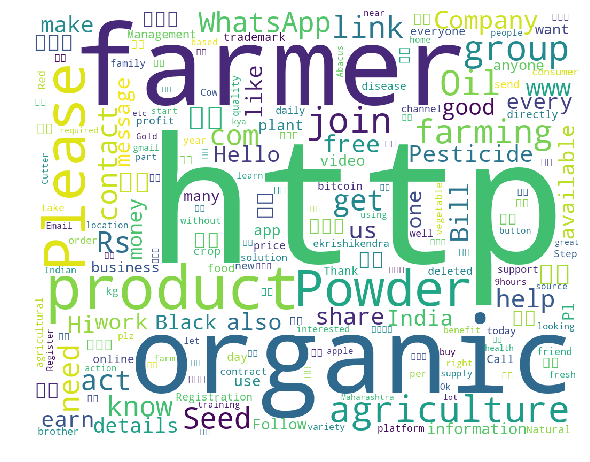

In [21]:
#wordcloud = WordCloud(font_path='Lohit-Devanagari.ttf',width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(text)
import unicodedata
import itertools 
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator
# Start with one review:
#text = df.Content[0]
text = " ".join(Content for Content in df.Content)
print ("There are {} words in the combination of all review.".format(len(text)))
#mask = np.array(Image.open("Tricolor_Flag_of_India.png"))
# Create and generate a word cloud image:

#wordcloud_india = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)
wordcloud = WordCloud(width = 1024, height = 800,background_color ='white',stopwords = news,min_font_size = 10,collocations=False).generate(text)
#image_colors = ImageColorGenerator(mask)
#plt.figure(figsize=[7,7])
#plt.imshow(wordcloud_india.recolor(color_func=image_colors), interpolation="bilinear")
#plt.axis("off")
#plt.tight_layout(pad = 0)

#plt.show()
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [22]:
wordcloud.to_file("first_review.png")

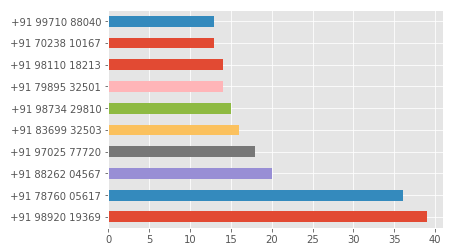

In [23]:
author_value_counts = df['Name'].value_counts() # Number of messages per author
top_10_author_value_counts = author_value_counts.head(10) # Number of messages per author for the top 10 most active authors
top_10_author_value_counts.plot.barh() # Plot a bar chart using pandas built-in plotting apis

In [24]:
#to find no authors of the message
null_authors_df = df[df['Name'].isnull()]
null_authors_df.head()

,Date,Time,Name,Content,DateTime,weekday,Letter_Count,Word_Count,Hour


In [25]:
media_messages_df = df[df['Content'] == "<Media omitted>"]
print(media_messages_df.head())

author_media_messages_value_counts = media_messages_df['Name'].value_counts()
top_10_author_media_messages_value_counts = author_media_messages_value_counts.head(10)
#top_10_author_media_messages_value_counts.pyplot.bar()
#let us create a new data frame (messages_df) by dropping all those messages that are either media messages or do not have an author
messages_df = df.drop(null_authors_df.index) # Drops all rows of the data frame containing messages from null authors
messages_df = messages_df.drop(media_messages_df.index) # Drops all rows of the data frame containing media messages
messages_df.head()

Empty DataFrame
Columns: [Date, Time, Name, Content, DateTime, weekday, Letter_Count, Word_Count, Hour]
Index: []


,Date,Time,Name,Content,DateTime,weekday,Letter_Count,Word_Count,Hour
0,23/09/2019,4:58 pm,+91 94660 22586,"*जरूरी सुचना*. बैंक बंन्द रहेंगे , समय रहते ज...",2019-09-23 16:58:00,Monday,315,65,4
1,23/09/2019,6:40 pm,+1 (804) 352,🔴WORK IN coca cola Company in USA. 🆓Free Visa...,2019-09-23 18:40:00,Monday,465,77,6
2,24/09/2019,10:51 am,+91 92840 00520,मल्चिंग पेपर ( Mulching Paper ). 1) उच्च गुणव...,2019-09-24 10:51:00,Tuesday,539,104,10
3,24/09/2019,11:14 am,+91 98110 18213,"Olive , ready to harvest, farm is 15 yrs old....",2019-09-24 11:14:00,Tuesday,171,30,11
4,24/09/2019,2:06 pm,+91 94538 10792,https,2019-09-24 14:06:00,Tuesday,6,2,2


Text(0,0.5,'Name')

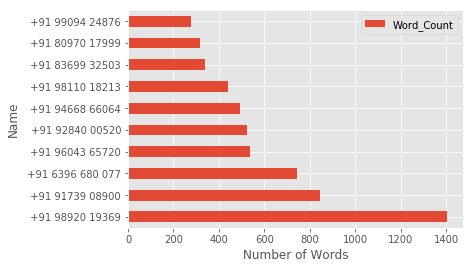

In [26]:
total_word_count_grouped_by_author = messages_df[['Name', 'Word_Count']].groupby('Name').sum()
sorted_total_word_count_grouped_by_author = total_word_count_grouped_by_author.sort_values('Word_Count', ascending=False)
top_10_sorted_total_word_count_grouped_by_author = sorted_total_word_count_grouped_by_author.head(10)
top_10_sorted_total_word_count_grouped_by_author.plot.barh()
plt.xlabel('Number of Words')
plt.ylabel('Name')

Text(0,0.5,'Frequency')

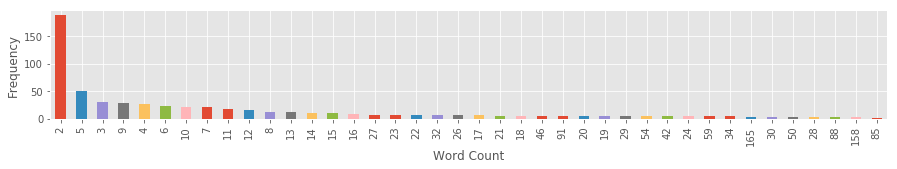

In [32]:
plt.figure(figsize=(15, 2)) # To ensure that the bar plot fits in the output cell of a Jupyter notebook
word_count_value_counts = messages_df['Word_Count'].value_counts()
top_40_word_count_value_counts = word_count_value_counts.head(40)
top_40_word_count_value_counts.plot.bar()
plt.xlabel('Word Count')
plt.ylabel('Frequency')

Text(0,0.5,'Name')

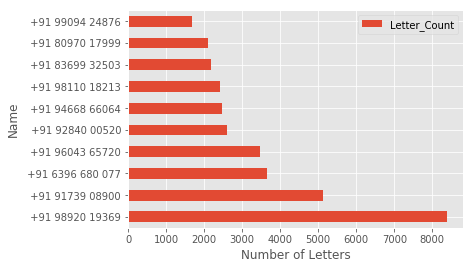

In [33]:
total_letter_count_grouped_by_author = messages_df[['Name', 'Letter_Count']].groupby('Name').sum()
sorted_total_letter_count_grouped_by_author = total_letter_count_grouped_by_author.sort_values('Letter_Count', ascending=False)
top_10_sorted_total_letter_count_grouped_by_author = sorted_total_letter_count_grouped_by_author.head(10)
top_10_sorted_total_letter_count_grouped_by_author.plot.barh()
plt.xlabel('Number of Letters')
plt.ylabel('Name')

Text(0,0.5,'Frequency')

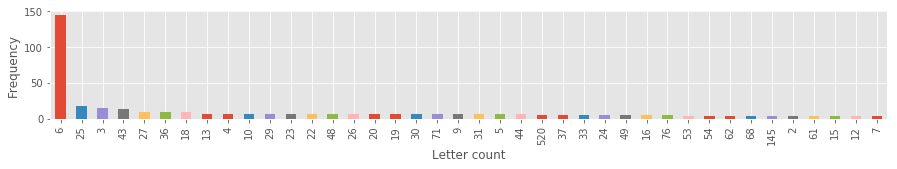

In [34]:
plt.figure(figsize=(15, 2))
letter_count_value_counts = messages_df['Letter_Count'].value_counts()
top_40_letter_count_value_counts = letter_count_value_counts.head(40)
top_40_letter_count_value_counts.plot.bar()
plt.xlabel('Letter count')
plt.ylabel('Frequency')

Text(0,0.5,'Date')

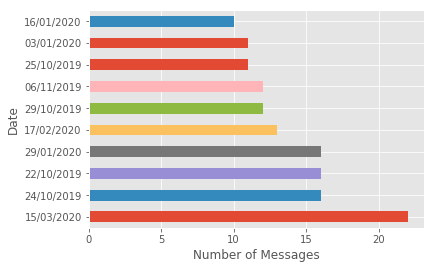

In [35]:
messages_df['Date'].value_counts().head(10).plot.barh() # Top 10 Dates on which the most number of messages were sent
plt.xlabel('Number of Messages')
plt.ylabel('Date')

Text(0,0.5,'Time')

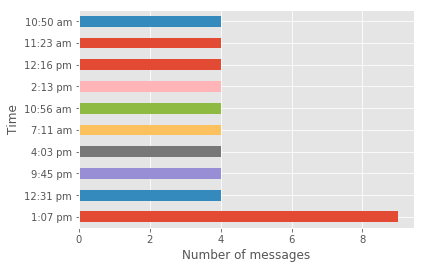

In [36]:
messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')